In [1]:
from keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 16s 1us/step


In [37]:
test_labels

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [4]:
import numpy as np

def vectorize_sequences(sequences,dimension=10000):
    results=np.zeros((len(sequences),dimension))
    for i,sequences in enumerate(sequences):
        results[i,sequences]=1
        return results
    
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(train_labels).astype('float32')

In [8]:
from keras import models
from keras import layers
model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

x_val=x_train[:10000]
partial_x_train=x_train[10000:]

y_val=y_train[:10000]
partial_y_train=y_train[10000:]



C:\Users\ilihas\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
history=model.fit(
partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val,y_val))


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 163ms/step - accuracy: 0.4985 - loss: 0.6932 - val_accuracy: 0.4947 - val_loss: 0.6932
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5035 - loss: 0.6931 - val_accuracy: 0.4947 - val_loss: 0.6932
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5077 - loss: 0.6931 - val_accuracy: 0.4947 - val_loss: 0.6932
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5066 - loss: 0.6931 - val_accuracy: 0.4947 - val_loss: 0.6932
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5012 - loss: 0.6932 - val_accuracy: 0.4947 - val_loss: 0.6932
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5066 - loss: 0.6931 - val_accuracy: 0.4947 - val_loss: 0.6932
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5079 - loss: 0.6931 - val_accuracy: 0.4947 - val_loss: 0.6932
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4952 - loss: 0.6932 - val_accuracy: 0.4947 - 

In [11]:
history_dict=history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [12]:
from keras import losses
import matplotlib.pyplot as plt


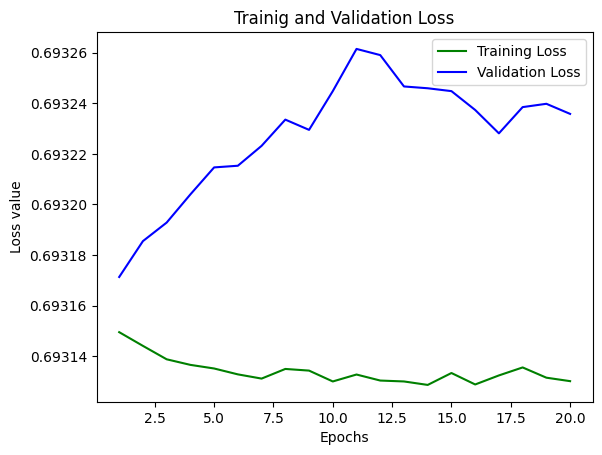

In [13]:
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']

epochs=range(1,len(loss_values)+1)

plt.plot(epochs,loss_values,'g',label="Training Loss")
plt.plot(epochs,val_loss_values,'b',label="Validation Loss")

plt.title('Trainig and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss value')
plt.legend()
plt.show()

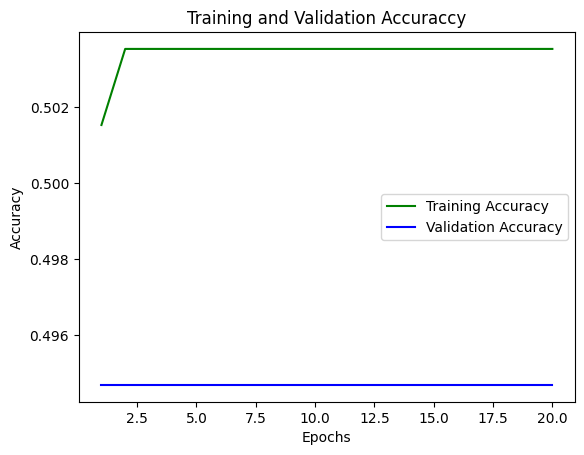

In [16]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, acc_values, 'g', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'b', label="Validation Accuracy")
plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [24]:
history=model.fit(
partial_x_train,
partial_y_train,
epochs=3,
batch_size=512,
validation_data=(x_val,y_val))

Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.5094 - loss: 0.6930 - val_accuracy: 0.4947 - val_loss: 0.6932
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5084 - loss: 0.6931 - val_accuracy: 0.4947 - val_loss: 0.6932
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5121 - loss: 0.6930 - val_accuracy: 0.4947 - val_loss: 0.6932


In [25]:
history_dict=history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

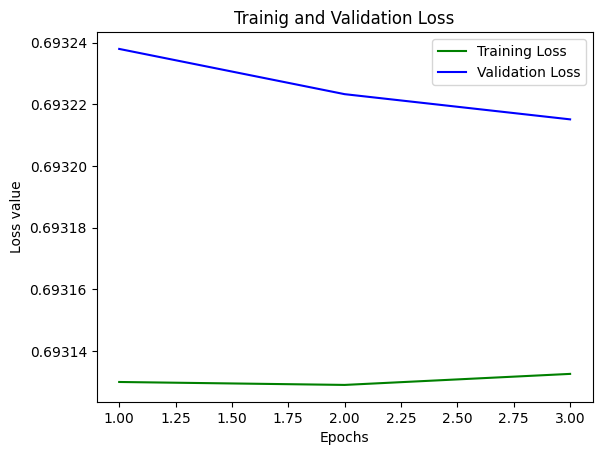

In [26]:
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']

epochs=range(1,len(loss_values)+1)

plt.plot(epochs,loss_values,'g',label="Training Loss")
plt.plot(epochs,val_loss_values,'b',label="Validation Loss")

plt.title('Trainig and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss value')
plt.legend()
plt.show()

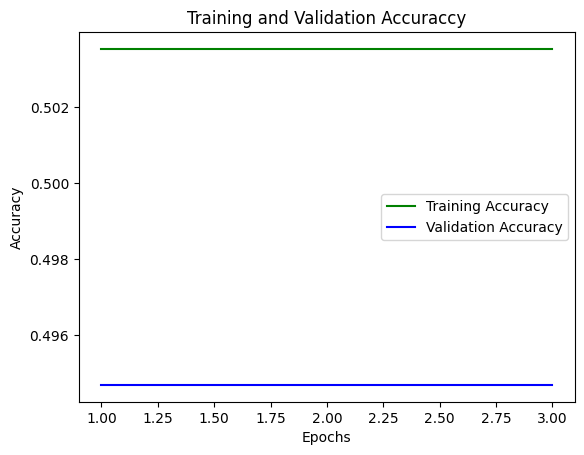

In [27]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, acc_values, 'g', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'b', label="Validation Accuracy")
plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [29]:
np.set_printoptions(suppress=True)
result = model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [30]:
result

array([[0.50884414],
       [0.4974488 ],
       [0.4974488 ],
       ...,
       [0.4974488 ],
       [0.4974488 ],
       [0.4974488 ]], dtype=float32)

In [32]:
y_pred = np.zeros(len(result))
for i, score in enumerate(result):
 y_pred[i] = np.round(score)

C:\Users\ilihas\AppData\Local\Temp\ipykernel_9304\3480974444.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] = np.round(score)


In [33]:
y_pred

array([1., 0., 0., ..., 0., 0., 0.])

In [35]:
from keras import metrics
mae = metrics.mean_absolute_error(y_pred, y_test)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.49996>